# "Lesson 1: Basic Stock Price Analysis on Jollibee Food Corp. (JFC)"
> "Introducing fastquant, a tool for easy access and analysis of stock data"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Lorenzo Ampil
- categories: [data, lesson]

# fastquant lesson 1

## Introduction to fastquant
**fastquant** is a python package that allows you easily access stock data with as few as 2 lines of python code.

Its goal is to promote data driven investments by making quantitative analysis in finance accessible to everyone.


## Objectives and strategies

1) **Raise awareness, and guide beginners** to get a sufficient foundation by teaching the basics of quant analysis with lectures presented via blog posts & online lectures

2) **Make quant analysis simple and easy** w/ a high level python API that allows for lower level configuration for more advanced users - development of an easy to use python package to facilitate data driven investments

|Objective|Strategy|
|---------|--------|
Raise awareness, and guide beginners | Tutorials via Medium articles & lectures|
Make quant analysis simple and easy | Beginner friendly high level python API

## Top down approach to lectures and package design

We start w/ immediate usefulness and then work towards “deep” understanding later as more experience is gained. This approach will be reflected in the design of the blog posts, lectures, and the fastquant package.

## Expect 1 - 2 lessons per month

medium article + notebook -> webinar

Medium article + notebook takes 1-2 weeks, while webinar will take 1-2 weeks. So the pace will generally be 1-2 webinars per month. 

*Webinars will be recorded and posted as content on facebook/youtube.*

## Course Outline (Part 1) - Backtesting Classic Technical Analysis Indicators
    1. Lecture 1: Accessing PSE data in 3 lines of code
        1. Accessing PSE data in 3 lines of code
        2. Plotting a basic SMAC strategy
        3. The idea of backtesting
    2. Lecture 2: Backtest your trading strategy with 5 lines of code
    3. Lecture 3: Relative Strength Index (Intro + backtesting)
    4. Lecture 4: Bollinger Bands (Intro + backtesting)
    5. Lecture 5: Moving Average Convergence Divergence (Intro + backtesting)
    6. Lecture 6: Backtesting multiple strategies at the same time

## Course Outline (Part 2) [TBD] - Building Advanced Indicators w/ Statistics & Machine Learning based Approaches + other financial indicators

## Setup
    1. Let's make sure everyone gets Google Colab working
    2. Show github and encourage people to make an account (if they want to contribute to fastquant).
    3. Please star the repo if you find it useful! :)







# Installation

Installing `fastquant` is super simple since it's on pypi!

In [1]:
#!pip3 install fastquant

# Get stock data from stock in 2 lines of code!

Here I demonstrate how to get the stock data of Jollibee (JFC is the stock symbol) from January 1, 2018 to January 1, 2019.

Please ensure that your date strings are in the format YYYY-MM-DD.

You can find a list of company names and PSE stock symbols [here](https://www.pesobility.com/stock/class-a), and Yahoo Finance symbols [here](https://finance.yahoo.com/)

In [3]:
from fastquant import get_stock_data

df = get_stock_data("SPY", "2018-01-01", "2019-01-01")
# df = get_stock_data('JFC', '2018-01-01', '2019-01-01')
df.head()

[*********************100%***********************]  1 of 1 completed


,open,high,low,close,volume
dt,,,,,
2018-01-02,267.839996,268.809998,267.399994,268.769989,86655700
2018-01-03,268.959991,270.640015,268.959991,270.470001,90070400
2018-01-04,271.200012,272.160004,270.540009,271.609985,80636400
2018-01-05,272.510010,273.559998,271.950012,273.420013,83524000
2018-01-08,273.309998,274.100006,272.980011,273.920013,57319200


In [4]:
help(get_stock_data)

Help on function get_stock_data in module fastquant.data.stocks.stocks:

get_stock_data(symbol, start_date, end_date, source='yahoo', format='ohlcv', dividends=True)
    Returns pricing data for a specified stock and source.
    
    Parameters
    ----------
    symbol : str
        Symbol of the stock in the PSE or Yahoo.
        You can refer to these links:
        PHISIX: https://www.pesobility.com/stock
        YAHOO: https://www.nasdaq.com/market-activity/stocks/screener?exchange=nasdaq
    start_date : str
        Starting date (YYYY-MM-DD) of the period that you want to get data on
    end_date : str
        Ending date (YYYY-MM-DD) of the period you want to get data on
    source : str
        First source to query from ("pse", "yahoo").
        If the stock is not found in the first source,
        the query is run on the other source.
    format : str
        Format of the output data
    
    Returns
    -------
    pandas.DataFrame
        Stock data (in the specified `fo

# Plot daily closing prices

For this part, we'll want to import a plotting package, matplotlib, to be able to visualize the closing prices of Jollibee. Don't worry if you don't understand how this works - for now, just take the code as is.

Text(0.5, 1.0, 'Daily Closing Prices of JFC\nfrom 2018-01-01 to 2019-01-01')

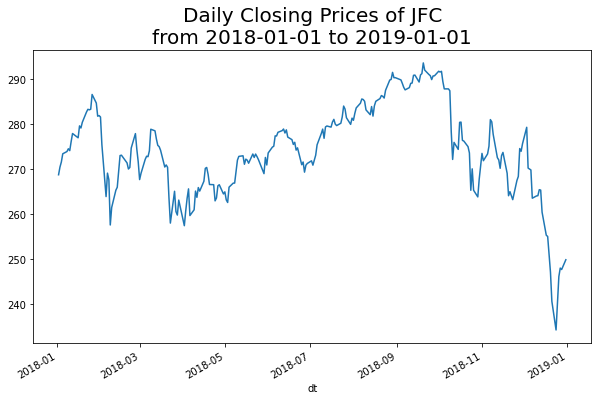

In [5]:
from matplotlib import pyplot as plt
df.close.plot(figsize=(10, 6))
plt.title("Daily Closing Prices of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

# Analyze with a simple moving average crossover (SMAC) trading strategy

Now that we have the data ready, let's visualize a sample SMAC strategy.

First, let's import the pandas library (general purpose library for handling tabular data).

In [6]:
import pandas as pd

Next, we calculate the 30 day moving average of Jollibee's closing price and combine it with the original closing price data.

In [7]:
ma30 = df.close.rolling(30).mean()
close_ma30 = pd.concat([df.close, ma30], axis=1).dropna()
close_ma30.columns = ['Closing Price', 'Simple Moving Average (30 day)']

In [8]:
ma30.dropna()

dt
2018-02-13    275.087667
2018-02-14    275.115000
2018-02-15    275.200334
2018-02-16    275.250334
2018-02-20    275.183000
                 ...    
2018-12-24    264.910333
2018-12-26    263.857666
2018-12-27    263.040999
2018-12-28    262.230666
2018-12-31    261.554665
Name: close, Length: 222, dtype: float64

<AxesSubplot:xlabel='dt'>

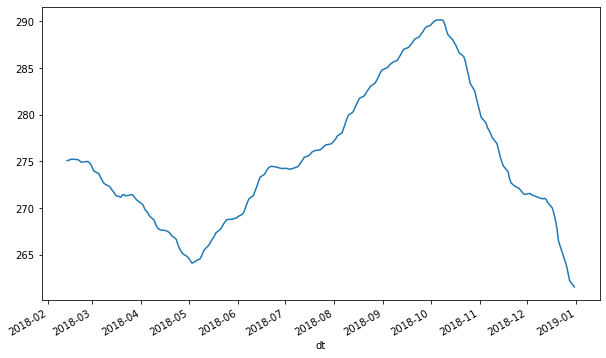

In [9]:
ma30.dropna().plot(figsize=(10, 6))

Lastly, we plot the trends for the daily closing prices and the 30 day SMA together

Text(0.5, 1.0, 'Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01')

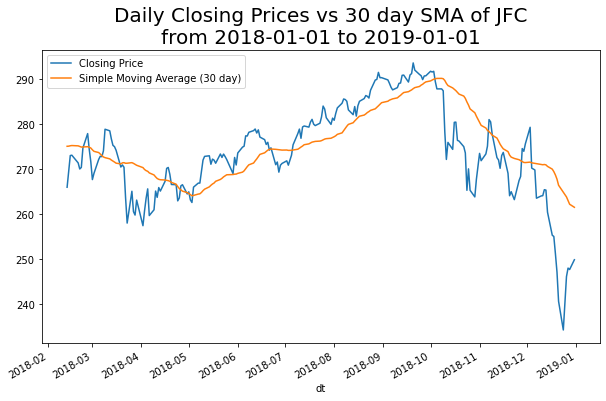

In [10]:
close_ma30.plot(figsize=(10, 6))
plt.title("Daily Closing Prices vs 30 day SMA of JFC\nfrom 2018-01-01 to 2019-01-01", fontsize=20)

## Relevant resources
1. [Access Philippine Stock Data with Only 2 Lines of Python](https://towardsdatascience.com/access-philippine-stock-data-with-only-2-lines-of-python-309780382b8d?source=friends_link&sk=d4eab964eae7407a62690e4be1c165d7)
2. [Technical analysis basics from investopedia](https://www.investopedia.com/technical-analysis-basic-education-4689655)
3. [My Learning Plan for Getting Into Data Science from Scratch](https://towardsdatascience.com/my-learning-plan-for-getting-into-data-science-from-scratch-9562f37b4dde?source=friends_link&sk=b67ab491956a074123b4260df1667de4)

## Thank you!